21.03.25 ML_DL MINIST - DNN,CNN

# MINIST - DNN, CNN

In [8]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import tensorflow.keras.utils as utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# 1. 데이터 셋 생성
width = 28; height=28
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width*height).astype('float32') / 255.0
x_test  = x_test.reshape(10000, width*height).astype('float32') / 255.0

x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

y_train = utils.to_categorical(y_train)
y_val   = utils.to_categorical(y_val)
y_test  = utils.to_categorical(y_test)

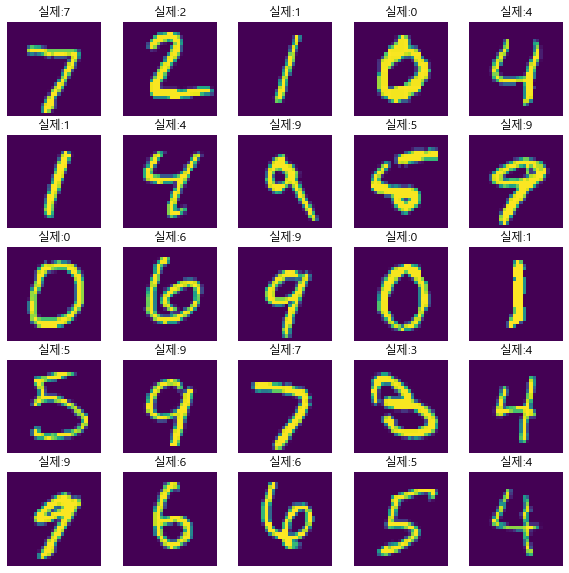

In [10]:
plt_row = 5
plt_col = 5
plt.rcParams['figure.figsize'] = (10,10)
plt.rc("font", family="Malgun Gothic")
f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i//5, i%5]
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt.axis("off")
    sub_plt.set_title("실제:"+str(np.argmax(y_test[i])))

## DNN(다중 퍼셉트론)

Epoch 1/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3813 - accuracy: 0.8844 - val_loss: 0.1069 - val_accuracy: 0.9668
Epoch 2/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0980 - accuracy: 0.9699 - val_loss: 0.1042 - val_accuracy: 0.9696
Epoch 3/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0680 - accuracy: 0.9791 - val_loss: 0.0992 - val_accuracy: 0.9699
Epoch 4/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0474 - accuracy: 0.9843 - val_loss: 0.0863 - val_accuracy: 0.9766
Epoch 5/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0401 - accuracy: 0.9861 - val_loss: 0.1149 - val_accuracy: 0.9670
Epoch 6/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0358 - accuracy: 0.9890 - val_loss: 0.0925 - val_accuracy: 0.9762
Epoch 7/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0295 - accuracy: 0.9908 - val_loss: 0.0984 - val_accuracy:

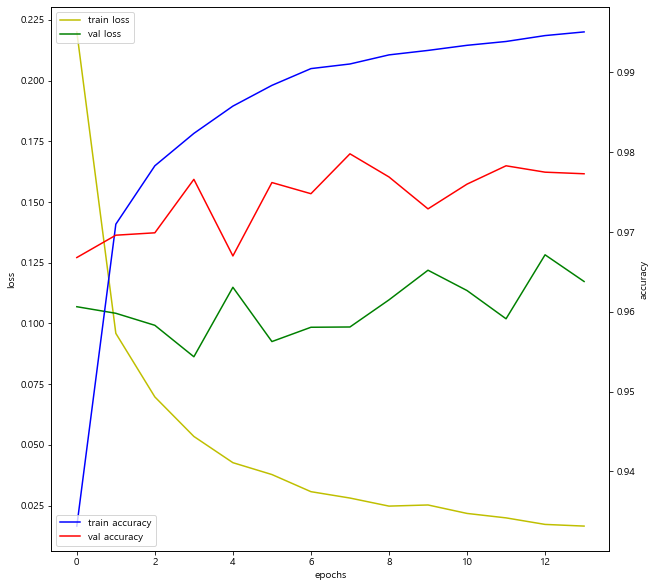

313/313 [==============================] - 0s 915us/step - loss: 0.1255 - accuracy: 0.9772


loss: 0.12550513446331024 ,metrics["accuracy"]: 0.9771999716758728


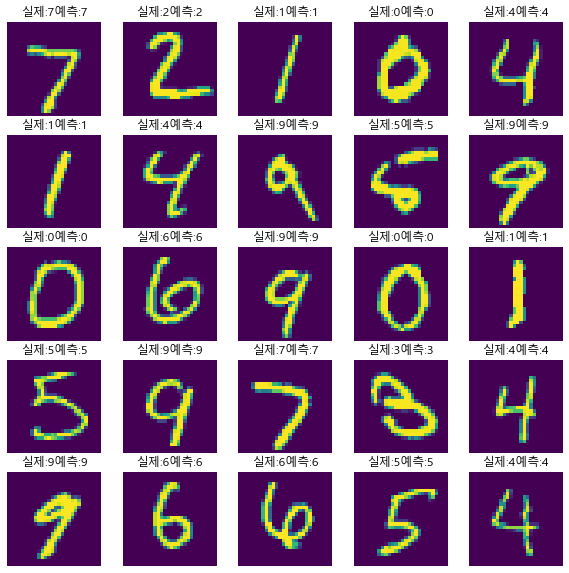

In [11]:
# 1. 데이터 셋 생성
width = 28; height=28
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width*height).astype('float32') / 255.0
x_test  = x_test.reshape(10000, width*height).astype('float32') / 255.0

x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

y_train = utils.to_categorical(y_train)
y_val   = utils.to_categorical(y_val)
y_test  = utils.to_categorical(y_test)

# 2. 모델 구성
model = Sequential()
model.add(Dense(256, input_dim=width*height, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(10, activation="softmax"))

# 3. 학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

# 4. 모델 학습시키기
early_stopping = EarlyStopping(patience=10)
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, 
                 validation_data=(x_val, y_val),
                 callbacks=[early_stopping])

# 5. 학습과정 살펴보기
fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history['loss'], 'y', label="train loss")
loss_ax.plot(hist.history['val_loss'], 'g', label="val loss")
loss_ax.set_xlabel("epochs")
loss_ax.set_ylabel("loss")

acc_ax = loss_ax.twinx() # x축 공유하는 acc_ax
acc_ax.plot(hist.history['accuracy'], 'b', label="train accuracy")
acc_ax.plot(hist.history['val_accuracy'], 'r', label="val accuracy")
acc_ax.set_ylabel("accuracy")

loss_ax.legend(loc="upper left")
acc_ax.legend(loc="lower left")
plt.show()

# 6. 모델 평가하기
score = model.evaluate(x_test, y_test, batch_size=32)
print("\n\nloss:", score[0], ',metrics["accuracy"]:', score[1])

# 7. 모델 사용하기(예측)
yhat = model.predict(x_test, batch_size=32)

plt_row = 5
plt_col = 5
plt.rcParams['figure.figsize'] = (10,10)
plt.rc("font", family="Malgun Gothic")
f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i//5, i%5]
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt.axis("off")
    title = "실제:"+str(np.argmax(y_test[i])) + "예측:"+str(np.argmax(yhat[i]))
    sub_plt.set_title(title)

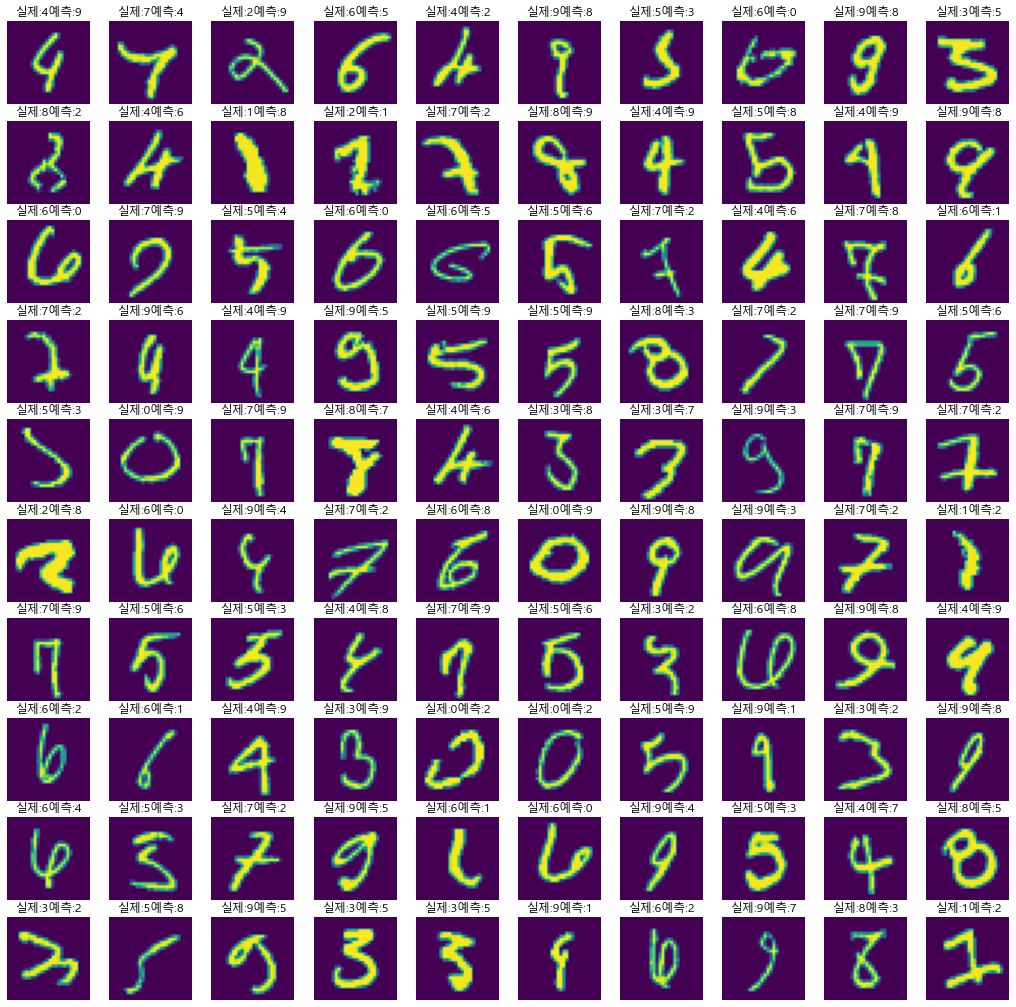

In [12]:
# 7. 모델 사용하기(예측)
yhat = model.predict(x_test, batch_size=32)
plt_row = 10
plt_col = 10
plt.rcParams['figure.figsize'] = (18,18)
plt.rc("font", family="Malgun Gothic")
f, axarr = plt.subplots(plt_row, plt_col)
i = 0
cnt = 0
while cnt < (plt_row*plt_col):
    if np.argmax(y_test[i]) == np.argmax(yhat[i]):
        i+=1
        continue
    sub_plt = axarr[cnt//plt_row, cnt%plt_col]
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt.axis("off")
    title = "실제:"+str(np.argmax(y_test[i])) + "예측:"+str(np.argmax(yhat[i]))
    sub_plt.set_title(title)
    i += 1
    cnt += 1

## CNN(컨벌루션 레이어)

Epoch 1/30
1563/1563 [==============================] - 21s 13ms/step - loss: 0.3287 - accuracy: 0.8996 - val_loss: 0.0530 - val_accuracy: 0.9852
Epoch 2/30
1563/1563 [==============================] - 21s 13ms/step - loss: 0.0521 - accuracy: 0.9837 - val_loss: 0.0447 - val_accuracy: 0.9866
Epoch 3/30
1563/1563 [==============================] - 20s 13ms/step - loss: 0.0329 - accuracy: 0.9897 - val_loss: 0.0418 - val_accuracy: 0.9879
Epoch 4/30
1563/1563 [==============================] - 21s 13ms/step - loss: 0.0214 - accuracy: 0.9935 - val_loss: 0.0413 - val_accuracy: 0.9881
Epoch 5/30
1563/1563 [==============================] - 22s 14ms/step - loss: 0.0158 - accuracy: 0.9950 - val_loss: 0.0567 - val_accuracy: 0.9850
Epoch 6/30
1563/1563 [==============================] - 23s 15ms/step - loss: 0.0143 - accuracy: 0.9947 - val_loss: 0.0355 - val_accuracy: 0.9911
Epoch 7/30
1563/1563 [==============================] - 22s 14ms/step - loss: 0.0096 - accuracy: 0.9970 - val_loss: 0.0487 -

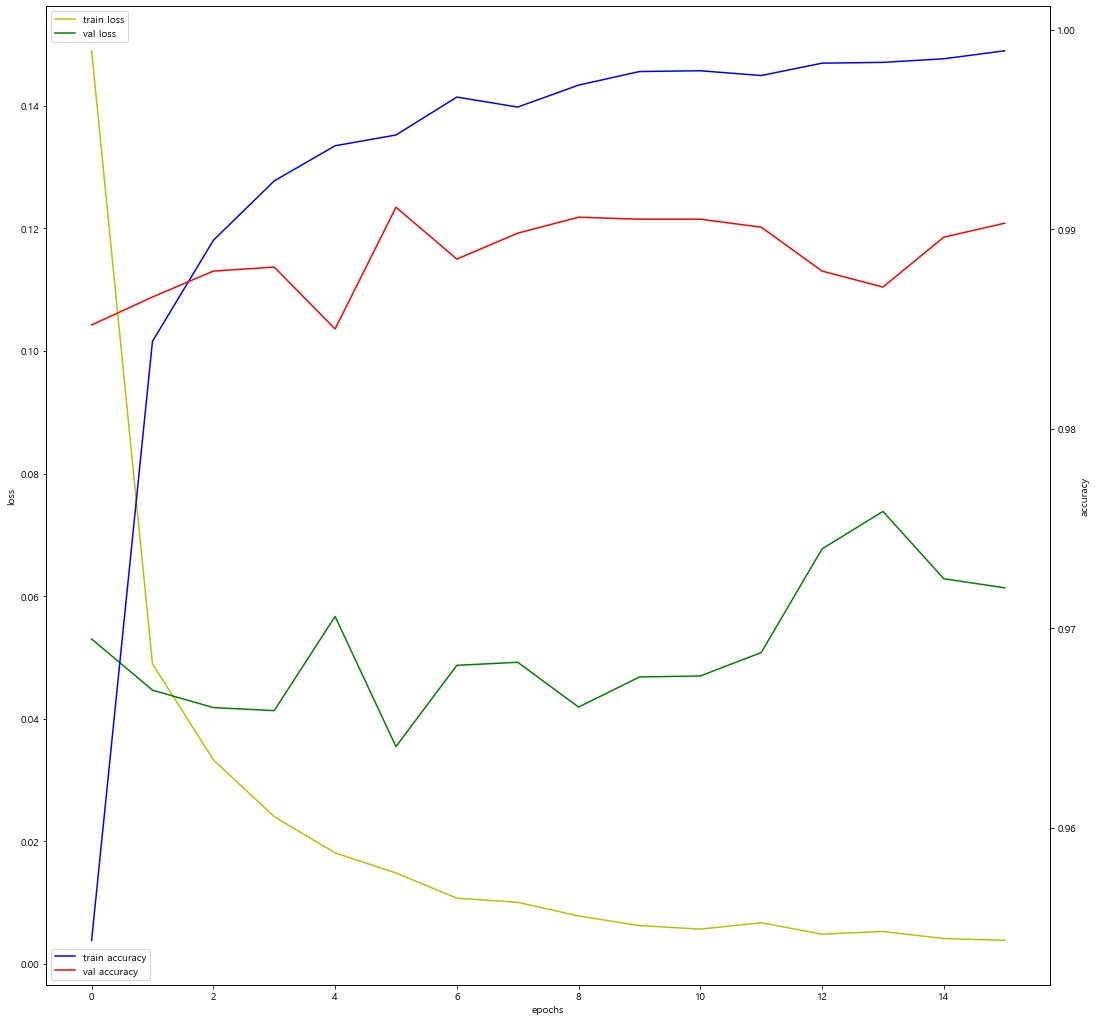

313/313 [==============================] - 1s 4ms/step - loss: 0.0451 - accuracy: 0.9927


loss: 0.04511754587292671 ,metrics["accuracy"]: 0.9926999807357788


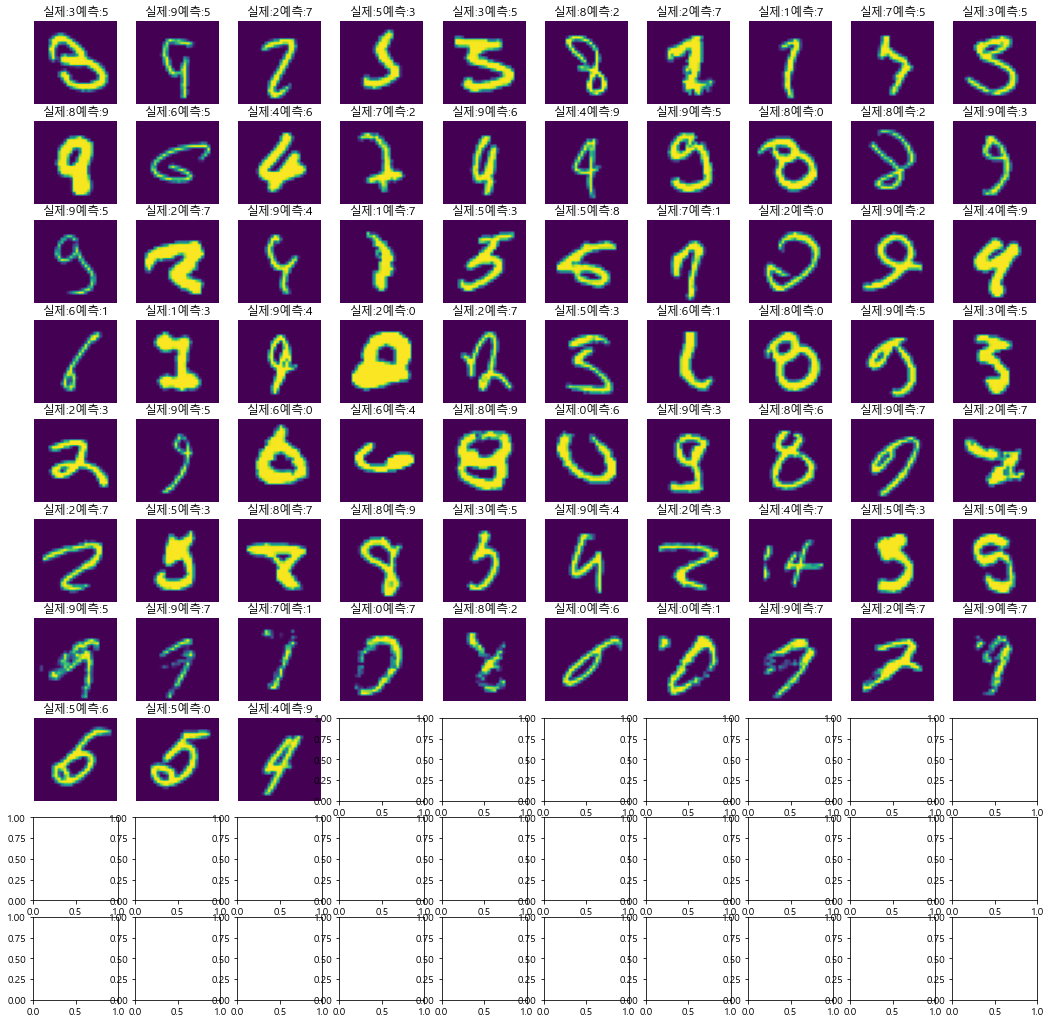

In [14]:
# 1. 데이터 셋 생성
width = 28; height=28
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width, height, 1).astype('float32') / 255.0
x_test  = x_test.reshape(10000, width, height, 1).astype('float32') / 255.0

x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

y_train = utils.to_categorical(y_train)
y_val   = utils.to_categorical(y_val)
y_test  = utils.to_categorical(y_test)

# 2. 모델 구성
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu', input_shape=(width, height, 1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256, input_dim=width*height, activation="relu"))
model.add(Dense(10, activation="softmax"))

# 3. 학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

# 4. 모델 학습시키기
early_stopping = EarlyStopping(patience=10)
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, 
                 validation_data=(x_val, y_val),
                 callbacks=[early_stopping])

# 5. 학습과정 살펴보기
fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history['loss'], 'y', label="train loss")
loss_ax.plot(hist.history['val_loss'], 'g', label="val loss")
loss_ax.set_xlabel("epochs")
loss_ax.set_ylabel("loss")

acc_ax = loss_ax.twinx() # x축 공유하는 acc_ax
acc_ax.plot(hist.history['accuracy'], 'b', label="train accuracy")
acc_ax.plot(hist.history['val_accuracy'], 'r', label="val accuracy")
acc_ax.set_ylabel("accuracy")

loss_ax.legend(loc="upper left")
acc_ax.legend(loc="lower left")
plt.show()

# 6. 모델 평가하기
score = model.evaluate(x_test, y_test, batch_size=32)
print("\n\nloss:", score[0], ',metrics["accuracy"]:', score[1])

# 7. 모델 사용하기(예측)
yhat = model.predict(x_test, batch_size=32)
plt_row = 10
plt_col = 10
plt.rcParams['figure.figsize'] = (18,18)
plt.rc("font", family="Malgun Gothic")
f, axarr = plt.subplots(plt_row, plt_col)
i = 0
cnt = 0
while cnt < (plt_row*plt_col) and (i < len(yhat)):
    if np.argmax(y_test[i]) == np.argmax(yhat[i]):
        i+=1
        continue
    sub_plt = axarr[cnt//plt_row, cnt%plt_col]
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt.axis("off")
    title = "실제:"+str(np.argmax(y_test[i])) + "예측:"+str(np.argmax(yhat[i]))
    sub_plt.set_title(title)
    i += 1
    cnt += 1

Epoch 1/30
1563/1563 [==============================] - 70s 44ms/step - loss: 0.3315 - accuracy: 0.8945 - val_loss: 0.0522 - val_accuracy: 0.9854
Epoch 2/30
1563/1563 [==============================] - 75s 48ms/step - loss: 0.0568 - accuracy: 0.9813 - val_loss: 0.0478 - val_accuracy: 0.9873
Epoch 3/30
1563/1563 [==============================] - 73s 47ms/step - loss: 0.0404 - accuracy: 0.9877 - val_loss: 0.0329 - val_accuracy: 0.9901
Epoch 4/30
1563/1563 [==============================] - 78s 50ms/step - loss: 0.0322 - accuracy: 0.9893 - val_loss: 0.0427 - val_accuracy: 0.9894
Epoch 5/30
1563/1563 [==============================] - 78s 50ms/step - loss: 0.0261 - accuracy: 0.9913 - val_loss: 0.0323 - val_accuracy: 0.9921
Epoch 6/30
1563/1563 [==============================] - 77s 49ms/step - loss: 0.0200 - accuracy: 0.9931 - val_loss: 0.0303 - val_accuracy: 0.9920
Epoch 7/30
1563/1563 [==============================] - 80s 51ms/step - loss: 0.0184 - accuracy: 0.9938 - val_loss: 0.0283 -

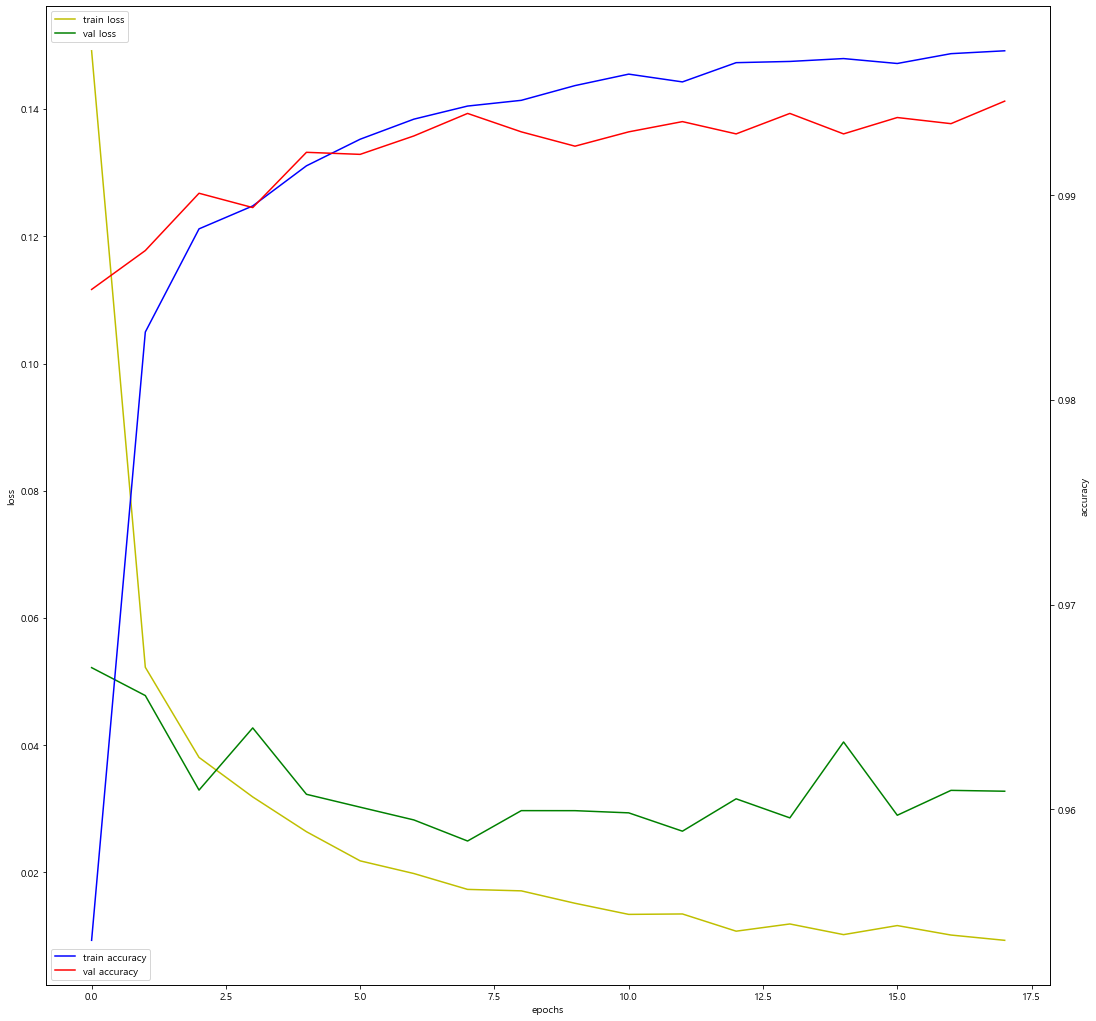

313/313 [==============================] - 2s 8ms/step - loss: 0.0294 - accuracy: 0.9941


loss: 0.02939910814166069 ,metrics["accuracy"]: 0.9940999746322632


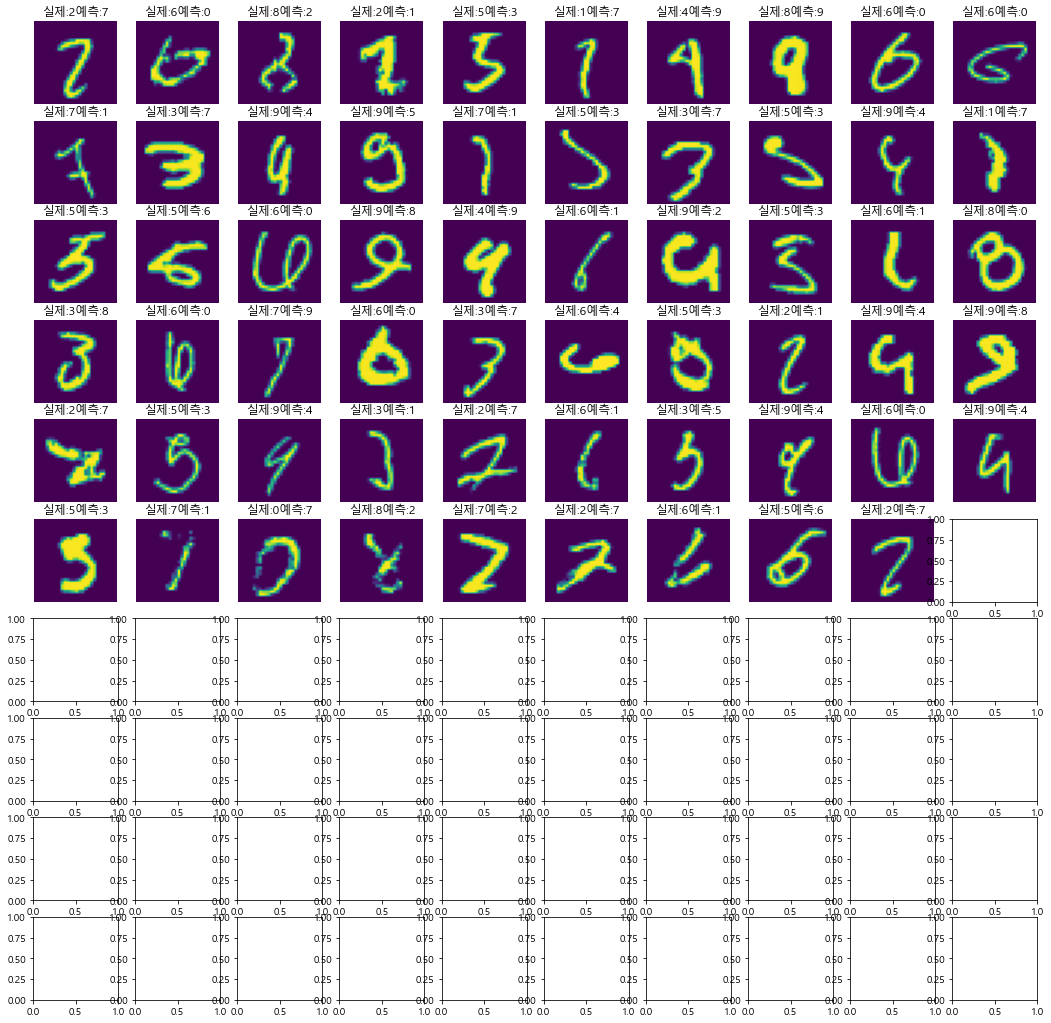

In [18]:
# 1. 데이터 셋 생성
width = 28; height=28
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width, height, 1).astype('float32') / 255.0
x_test  = x_test.reshape(10000, width, height, 1).astype('float32') / 255.0

x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

y_train = utils.to_categorical(y_train)
y_val   = utils.to_categorical(y_val)
y_test  = utils.to_categorical(y_test)

# 2. 모델 구성
model = Sequential()
model.add(Conv2D(32, (3,3), activation="relu", input_shape=(width, height, 1)))
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, input_dim=width*height, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(10, activation="softmax"))

# 3. 학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

# 4. 모델 학습시키기
early_stopping = EarlyStopping(patience=10)
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, 
                 validation_data=(x_val, y_val),
                 callbacks=[early_stopping])

# 5. 학습과정 살펴보기
fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history['loss'], 'y', label="train loss")
loss_ax.plot(hist.history['val_loss'], 'g', label="val loss")
loss_ax.set_xlabel("epochs")
loss_ax.set_ylabel("loss")

acc_ax = loss_ax.twinx() # x축 공유하는 acc_ax
acc_ax.plot(hist.history['accuracy'], 'b', label="train accuracy")
acc_ax.plot(hist.history['val_accuracy'], 'r', label="val accuracy")
acc_ax.set_ylabel("accuracy")

loss_ax.legend(loc="upper left")
acc_ax.legend(loc="lower left")
plt.show()

# 6. 모델 평가하기
score = model.evaluate(x_test, y_test, batch_size=32)
print("\n\nloss:", score[0], ',metrics["accuracy"]:', score[1])

# 7. 모델 사용하기(예측)
yhat = model.predict(x_test, batch_size=32)
plt_row = 10
plt_col = 10
plt.rcParams['figure.figsize'] = (18,18)
plt.rc("font", family="Malgun Gothic")
f, axarr = plt.subplots(plt_row, plt_col)
i = 0
cnt = 0
while ( cnt < (plt_row*plt_col) ) and ( i<len(yhat) ):
    if np.argmax(y_test[i]) == np.argmax(yhat[i]):
        i+=1
        continue
    sub_plt = axarr[cnt//plt_row, cnt%plt_col]
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt.axis("off")
    title = "실제:"+str(np.argmax(y_test[i])) + "예측:"+str(np.argmax(yhat[i]))
    sub_plt.set_title(title)
    i += 1
    cnt += 1